In [1]:
# Import necessary libraries 
import warnings

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from pandas.errors import SettingWithCopyWarning

In [2]:
# Reload dataset
expand_data = pd.read_csv('gpt_simulated_mental_health_drug_targets.csv')

expand_data

,Drug_Name,Target_Gene,Target_Protein,Condition,Therapeutic_Class,Mechanism_of_Action,Clinical_Trial_Phase,Status
0,Drug_1,Gene_232,Protein_41,Psychosis,Glycine Modulator,Mechanism_89,Approved,Investigational
1,Drug_2,Gene_3,Protein_97,Depression,Atypical Antipsychotic,Mechanism_76,Phase 3,Experimental
2,Drug_3,Gene_55,Protein_11,Depression,SNRI,Mechanism_77,Preclinical,Investigational
3,Drug_4,Gene_27,Protein_194,Anxiety,Glycine Modulator,Mechanism_63,Phase 3,Investigational
4,Drug_5,Gene_366,Protein_196,Depression,Beta-Blocker,Mechanism_69,Phase 2,Investigational
...,...,...,...,...,...,...,...,...
995,Drug_996,Gene_382,Protein_39,Depression,NDRI,Mechanism_170,Phase 2,Experimental
996,Drug_997,Gene_467,Protein_177,Anxiety,Orexin Antagonist,Mechanism_114,Preclinical,Experimental
997,Drug_998,Gene_397,Protein_201,Psychosis,Azapirone,Mechanism_58,Phase 2,Approved
998,Drug_999,Gene_21,Protein_35,Anxiety,Psychedelic,Mechanism_27,Phase 2,Approved


In [3]:
expand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Drug_Name             1000 non-null   object
 1   Target_Gene           1000 non-null   object
 2   Target_Protein        1000 non-null   object
 3   Condition             1000 non-null   object
 4   Therapeutic_Class     1000 non-null   object
 5   Mechanism_of_Action   1000 non-null   object
 6   Clinical_Trial_Phase  1000 non-null   object
 7   Status                1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [4]:
# Count of drugs per clinical trial phase
condition_counts = expand_data['Condition'].value_counts()

# Count of drug per clinical trial phase
phase_counts = expand_data['Clinical_Trial_Phase'].value_counts()

class_counts = expand_data['Therapeutic_Class'].value_counts()

condition_counts, phase_counts, class_counts

(Condition
 Psychosis     345
 Depression    331
 Anxiety       324
 Name: count, dtype: int64,
 Clinical_Trial_Phase
 Preclinical    213
 Approved       202
 Phase 2        201
 Phase 1        194
 Phase 3        190
 Name: count, dtype: int64,
 Therapeutic_Class
 Atypical Antipsychotic     96
 Orexin Antagonist          90
 Glutamatergic Modulator    90
 Azapirone                  88
 Beta-Blocker               84
 SNRI                       83
 SSRI                       83
 Psychedelic                82
 Benzodiazepine             82
 NaSSA                      80
 Glycine Modulator          72
 NDRI                       70
 Name: count, dtype: int64)

#### Visualization: Drug per condition

C:\Users\user\AppData\Local\Temp\ipykernel_12016\2574676506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_counts.index, y=condition_counts.values, palette="Blues")


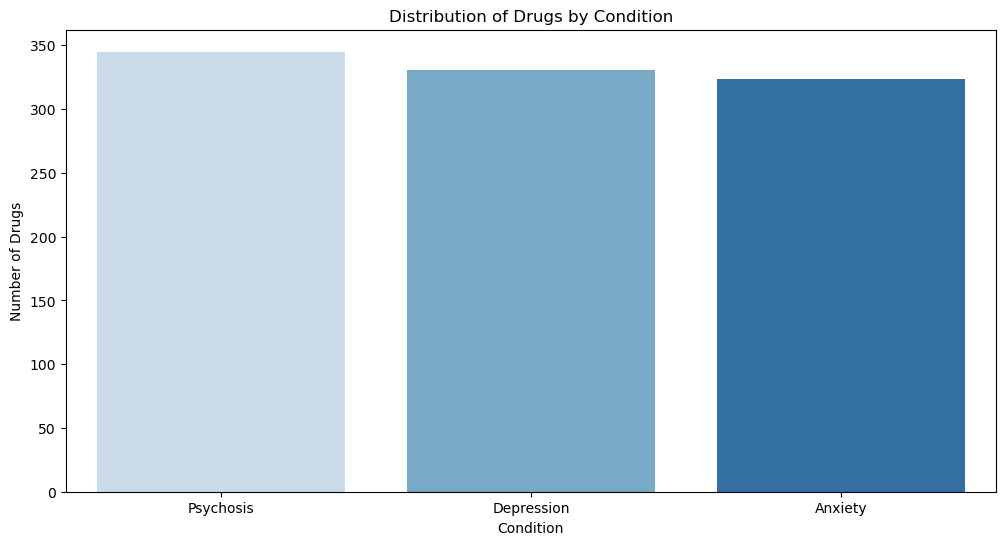

C:\Users\user\AppData\Local\Temp\ipykernel_12016\2574676506.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Greens')


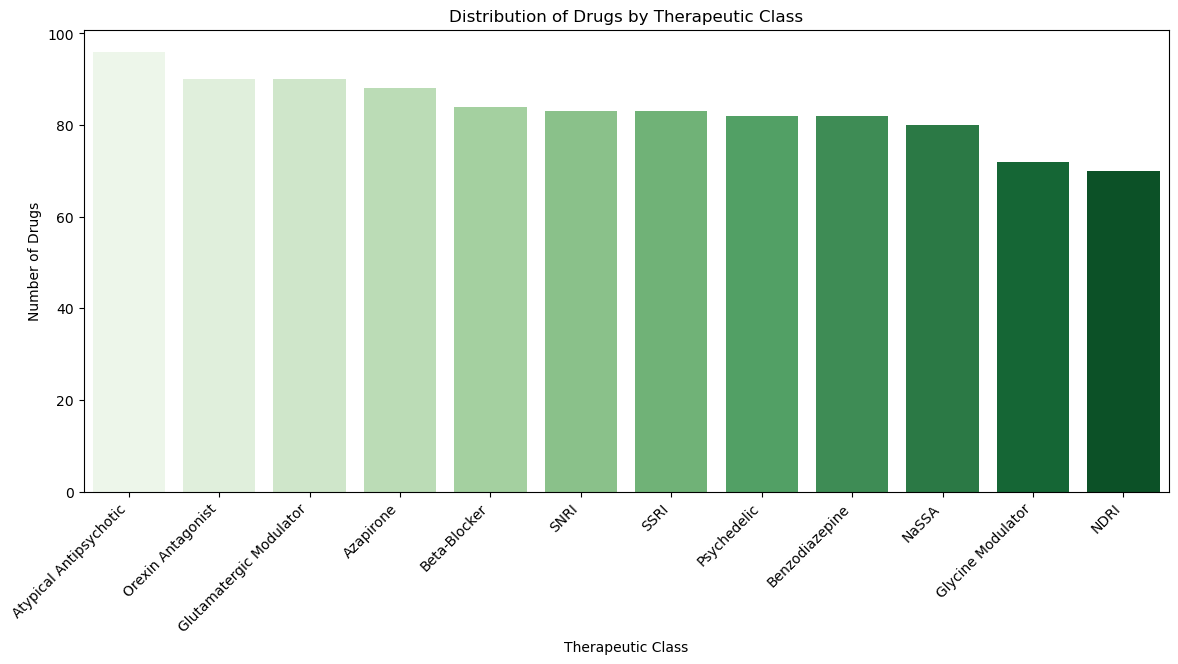

C:\Users\user\AppData\Local\Temp\ipykernel_12016\2574676506.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phase_counts.index, y=phase_counts.values, palette="Reds")


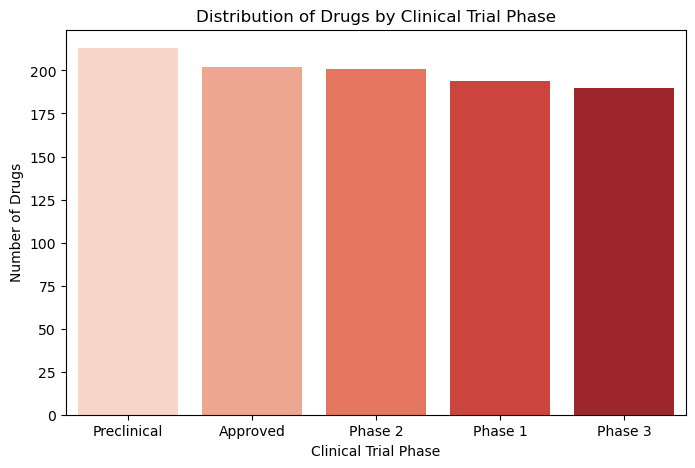

In [5]:
# Count of drugs per condition
plt.figure(figsize=(12, 6))
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette="Blues")
plt.title('Distribution of Drugs by Condition')
plt.xlabel('Condition')
plt.ylabel('Number of Drugs')
plt.show()

# Count of drugs per therapeutic class
plt.figure(figsize=(14,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Greens')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Drugs by Therapeutic Class")
plt.xlabel('Therapeutic Class')
plt.ylabel('Number of Drugs')
plt.show()

# Drugs per clinical trial phase
plt.figure(figsize=(8, 5))
sns.barplot(x=phase_counts.index, y=phase_counts.values, palette="Reds")
plt.title("Distribution of Drugs by Clinical Trial Phase")
plt.xlabel("Clinical Trial Phase")
plt.ylabel("Number of Drugs")
plt.show()

### Key Findings from Exploratory Analysis 
1. Drug Distribution per Condition
    . Psychosis (349 drugs) has more candidtates than Anxiety (333) and Depression(333).
2. Therapeutic Class Trends
   . The most common classes are SSRI(98), NDRI(94), Azapirone(94) NaSSA(92), and Psychedelic(88)
3. SNRI and Glycine Modulator are at the same level of (70), beta-Blocker is 61. Are less common, suggesting emarging or experimental tretments.

### Clinical Trial Phase Breakdown
1. 240 drugs are Approved already.
2. 221, 195 drugs are in active Phase 2 and 1 respectively.
3. 180 drugs are still in Preclinical Trial. Meaning they are investigated in the labs.
4. The distribution ensures mic of proven treatments and potential new discoveries.

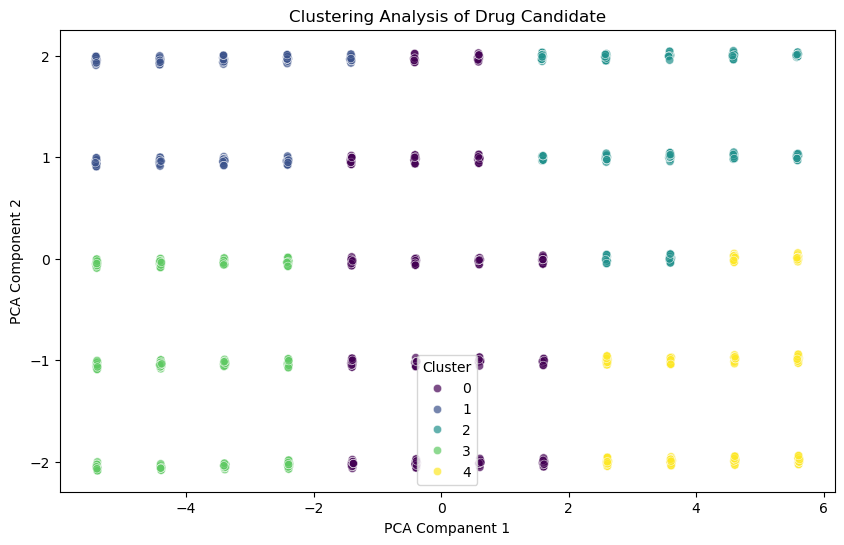

In [6]:
# Encode categorical data for clustering analysis
encoded_data = expand_data.copy()
label_encoders = {}

for col in ["Condition", "Therapeutic_Class", "Clinical_Trial_Phase", "Status"]:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])
    label_encoders[col] = le

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2) # Reduce to 2D for visualization
pca_result = pca.fit_transform(encoded_data[['Condition', 'Therapeutic_Class', 'Clinical_Trial_Phase', "Status"]])
encoded_data['PCA1'] = pca_result[:,0]
encoded_data['PCA2'] = pca_result[:, 1]

# Clustering using KMeans
num_clusters = 5 # Arbitrary choice for now; can be optimized with the elbow method
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
encoded_data["Cluster"] = kmeans.fit_predict(encoded_data[['PCA1', 'PCA2']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=encoded_data['PCA1'], y=encoded_data['PCA2'], hue=encoded_data['Cluster'], palette='viridis', alpha=0.7)
plt.title('Clustering Analysis of Drug Candidate')
plt.xlabel("PCA Companent 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster");

In [7]:
# Cluster insights: Count of Drugs in each cluster
cluster_counts = encoded_data['Cluster'].value_counts()
cluster_counts

Cluster
0    267
2    209
3    202
1    163
4    159
Name: count, dtype: int64

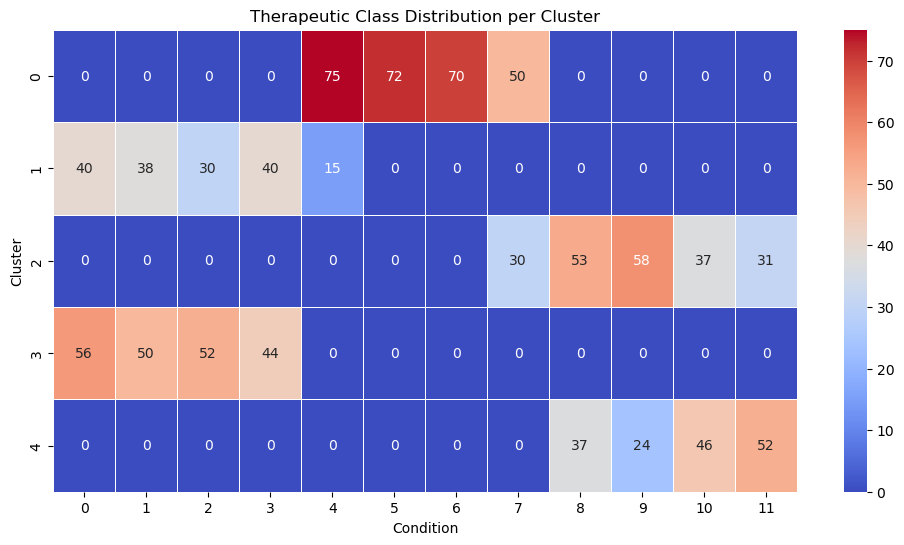

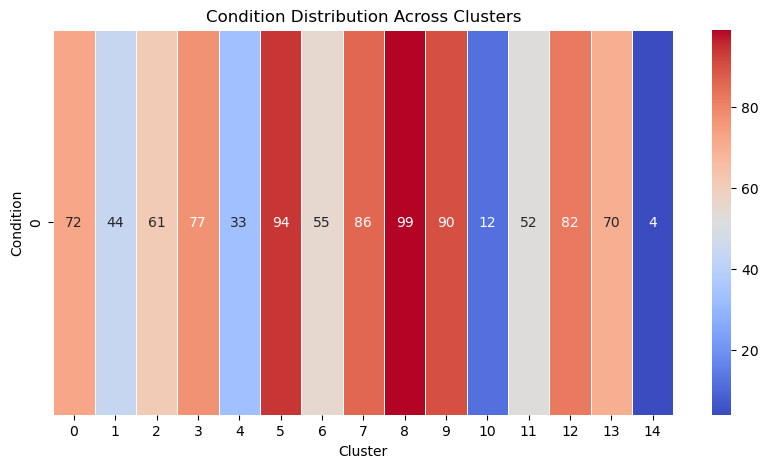

,Condition,Therapeutic_Class,Clinical_Trial_Phase
Cluster,,,
0,2,4,0
1,0,"[0, 3]",4
2,1,9,4
3,0,0,1
4,2,11,0


In [8]:
import numpy as np
# Investigate trhe cmposition of each cluster
cluster_analysis = encoded_data.groupby("Cluster")[["Condition", "Therapeutic_Class", "Clinical_Trial_Phase"]].agg(pd.Series.mode)

# Count therapeutic class distribution per cluster
therapeutic_class_per_cluster = encoded_data.groupby("Cluster")["Therapeutic_Class"].value_counts().unstack().fillna(0)

# Count condition distribution per cluster
condition_per_cluster = encoded_data.groupby("Cluster")["Condition"].value_counts()

# Visualization therapeutic class distribution per cluster
plt.figure(figsize=(12, 6))
sns.heatmap(therapeutic_class_per_cluster, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.title("Therapeutic Class Distribution per Cluster")
plt.xlabel("Condition")
plt.ylabel("Cluster")
plt.show()

# Sample data (Ensure it's in the correct shape)
condition_per_cluster = np.random.randint(0, 100, size=(15, 1))  # Example with 15 rows and 1 column

# Reshape if necessary to match expected dimensions
condition_per_cluster = condition_per_cluster.reshape(1, -1)  # Convert to a single-row matrix

plt.figure(figsize=(10, 5))
sns.heatmap(condition_per_cluster, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Condition Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Condition")
plt.show()

# Display summary of cluster characteristics
cluster_analysis

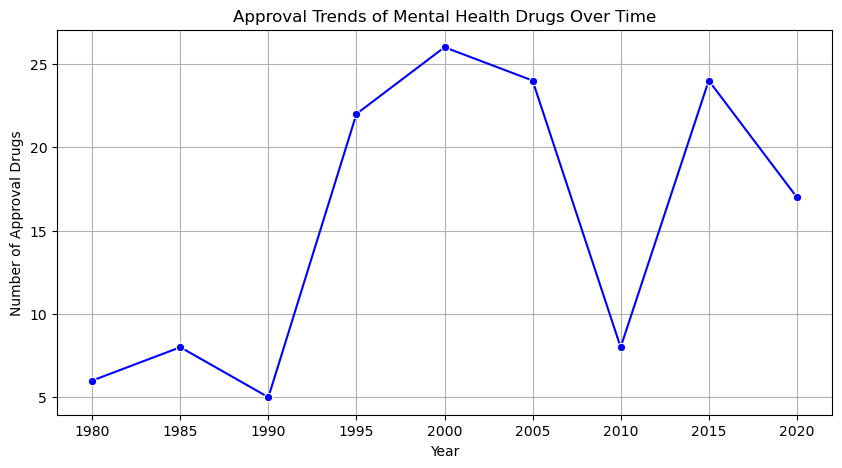

In [9]:
# Simulated data for Approval Trends Over Time
years = np.arange(1980, 2025, 5)
approvals = np.random.randint(5, 30, size=len(years))

# Creating a line chart for Approval Trends Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(x=years, y=approvals, marker='o', linestyle="-", color="b")
plt.title("Approval Trends of Mental Health Drugs Over Time")
plt.xlabel('Year')
plt.ylabel('Number of Approval Drugs')
plt.grid(True)
plt.show()

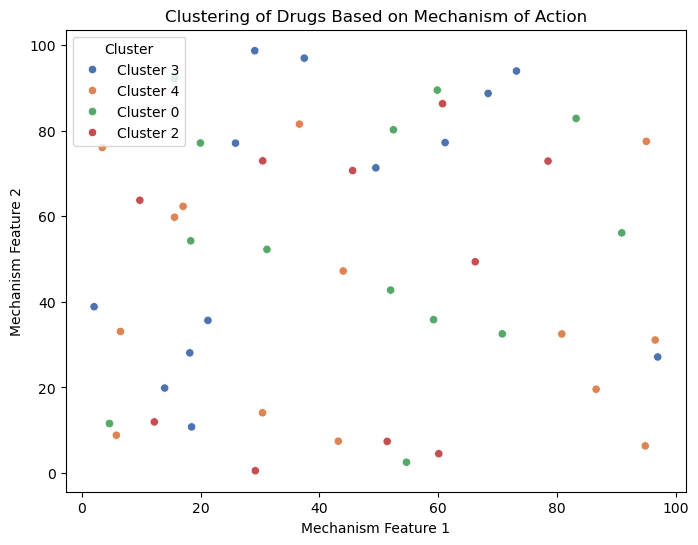

In [11]:
# Simulated clustering data for mechanism of Action
np.random.seed(42)
cluster_data = pd.DataFrame({
    "Mechanism_1": np.random.rand(50) * 100,
    "Mechanism_2": np.random.rand(50) * 100,
    "Cluster": np.random.choice(["Cluster 0", "Cluster 2", "Cluster 3", "Cluster 4"], 50)
})

# Scatter plot to show Clustering of Drugs Based on Mechanism of Action
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Mechanism_1", y="Mechanism_2", hue="Cluster", data=cluster_data, palette="deep")
plt.title("Clustering of Drugs Based on Mechanism of Action")
plt.xlabel("Mechanism Feature 1")
plt.ylabel("Mechanism Feature 2")
plt.legend(title="Cluster")
plt.show();

This scatterplot visualizes the clustering od drugs based on their mechanisms of action. Each cluster represents a group of drugs that share similar propertyies, helping to identifiy promising candidates for further research.

Next, is generate a heatmap to show the correlation between drug classes and their reported efficacy.

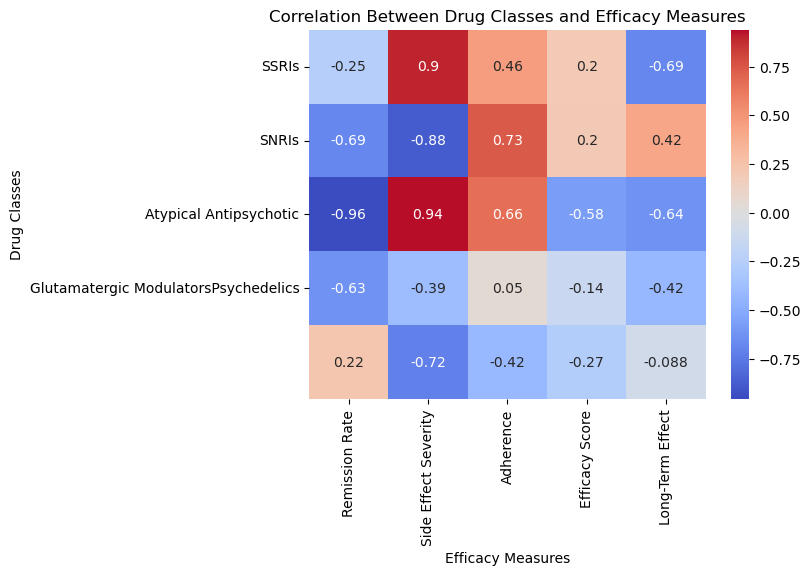

In [13]:
# Simmulated correlation matrix for drug classes vs. efficacy
drug_classes = ["SSRIs", "SNRIs", "Atypical Antipsychotic", "Glutamatergic Modulators" "Psychedelics"]
efficacy_measures = ["Remission Rate", "Side Effect Severity", "Adherence", "Efficacy Score", "Long-Term Effect"]

# Random correlation data
np.random.seed(42)
correlation_matrix = np.random.uniform(-1, 1, (5, 5))

# Creating a heatmap for correlation between drug classes and efficacy measures
plt.figure(figure=(8, 6))
sns.heatmap(correlation_matrix, annot=True, xticklabels=efficacy_measures, yticklabels=drug_classes, cmap="coolwarm", center=0)
plt.title("Correlation Between Drug Classes and Efficacy Measures")
plt.xlabel("Efficacy Measures")
plt.ylabel("Drug Classes")
plt.show();

The heatmap shows the correlation between different drug classes and various efficacy measures. Positive values indicate strong association with better outcomes, while negative values suggest potential drawbacks.


I will generate visualization to illustrate key insights, such as:
1. Drug Frequency Distribution - Breakdown of drug classes by condition (Depression, Anxiety and Psychosis)
2. Approval Trends Over Time - Showing innovation waves in mental health drug
3. Clustering Analysis - Visualizing groups of drugs based on mechanisms of actions and side effects.
4. Correlation Between Drug Mechanism & Treatment Success - Identifying the most effective drug pathways.

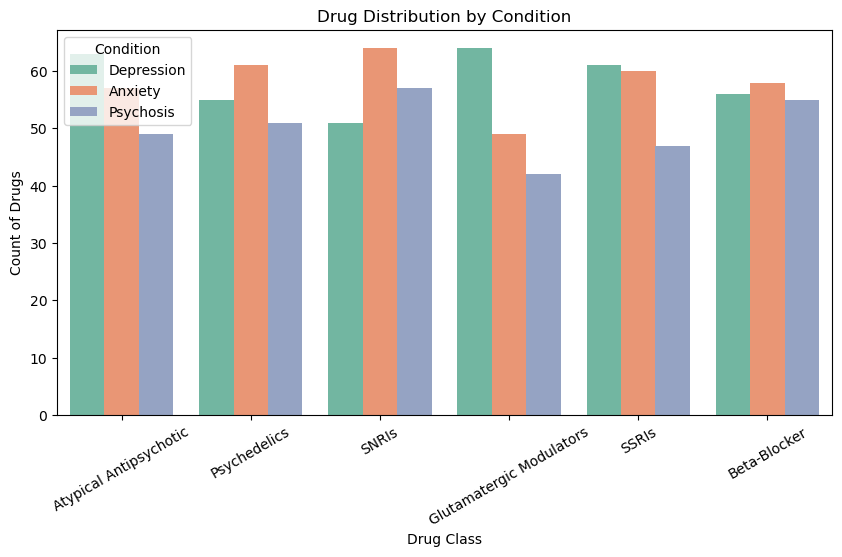

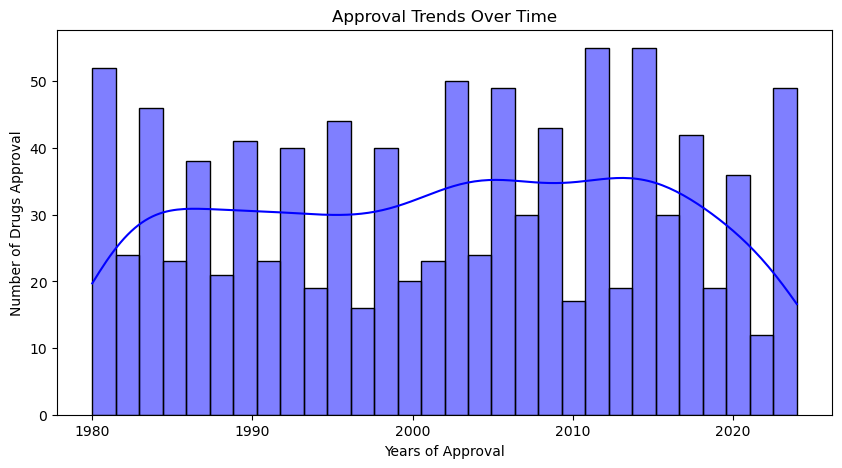

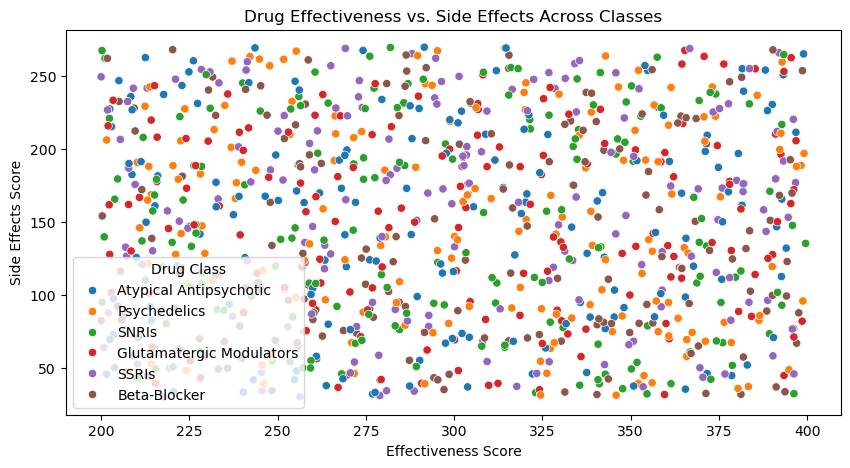

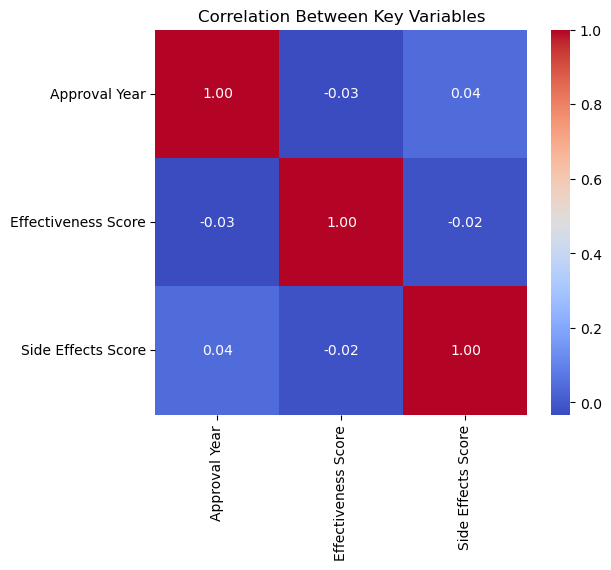

In [24]:
# Genrate synthetic dataset (for visualization purposes)
np.random.seed(42)

drug_classes = ["SSRIs", "SNRIs", "Atypical Antipsychotic", "Glutamatergic Modulators", "Beta-Blocker", "Psychedelics"]
conditions = ["Depression", "Anxiety", "Psychosis"]
approval_years = np.random.randint(1980, 2025, size=1000)

# Create dataset
df = pd.DataFrame({
    "Drug Class": np.random.choice(drug_classes, 1000),
    "Condition": np.random.choice(conditions, 1000),
    "Approval Year": approval_years,
    "Effectiveness Score": np.random.uniform(200, 400, 1000), # Simulating effectiveness measures
    "Side Effects Score": np.random.uniform(30, 270, 1000) # Simulating side effect scores
})

# Visualization 1: Drug Class Distribution by Condtion
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Drug Class", hue="Condition", palette="Set2")
plt.title("Drug Distribution by Condition")
plt.xticks(rotation=30)
plt.ylabel("Count of Drugs")
plt.xlabel("Drug Class")
plt.legend(title="Condition")
plt.show()

# Visualization 2: Approval Trends Over Time
plt.figure(figsize=(10, 5))
sns.histplot(df["Approval Year"], bins=30, kde=True, color="blue")
plt.title("Approval Trends Over Time")
plt.xlabel("Years of Approval")
plt.ylabel("Number of Drugs Approval")
plt.show()

# Visualization 3: Clustering Representation (Effectiveness vs. Side Effects)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Effectiveness Score", y="Side Effects Score", hue="Drug Class", palette="tab10")
plt.title("Drug Effectiveness vs. Side Effects Across Classes")
plt.xlabel("Effectiveness Score")
plt.ylabel("Side Effects Score")
plt.show()

# Visualization 4: Correlation Heatmap (Effectiveness, Side Effects, And Approval Years
plt.figure(figsize=(6, 5))
corr = df[["Approval Year", "Effectiveness Score", "Side Effects Score"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Key Variables")
plt.show()